# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [21]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [22]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [23]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [25]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
#  1. Get the total rides for each city type
total_rides_by_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [26]:
# 2. Get the total drivers for each city type
total_drivers_by_type=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [27]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [28]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride=pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [29]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver=total_fares_by_type/total_drivers_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [30]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
             "Total Rides": total_rides_by_type,
             "Total Drivers": total_drivers_by_type,
             "Total Fares":total_fares_by_type,
             "Average Fare per Ride":average_fare_per_ride,
             "Average Fare per Driver":average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [32]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [33]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [34]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [50]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 

#  for each date where the indices are the city type and date.
pyber_data_df.index = pd.DatetimeIndex(pyber_data_df['date'])
pyber_data_df.index

DatetimeIndex(['2019-01-14 10:14:22', '2019-03-04 18:24:09',
               '2019-02-24 04:29:00', '2019-02-10 23:22:03',
               '2019-03-06 04:28:35', '2019-03-11 12:26:48',
               '2019-02-27 11:17:56', '2019-04-26 00:43:24',
               '2019-01-08 03:28:48', '2019-03-09 06:26:29',
               ...
               '2019-04-19 04:32:47', '2019-03-18 10:38:05',
               '2019-01-27 18:43:05', '2019-04-29 01:58:44',
               '2019-01-30 10:55:23', '2019-04-29 17:04:39',
               '2019-01-30 00:05:47', '2019-02-10 21:03:50',
               '2019-05-07 19:22:15', '2019-04-25 10:20:13'],
              dtype='datetime64[ns]', name='date', length=2375, freq=None)

In [52]:
# creating a new Dataframe of fares with Datetime index
New_pyber_df = pyber_data_df[["type","fare"]].copy()
New_pyber_df.head()
#New_pyber_df.info()

,type,fare
date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [53]:
# creating a new Dataframe of fares with Datetime index and city type
Fares_by_cities_Dates= pd.DataFrame({"Fare": New_pyber_df.groupby(["type","date"]).sum()["fare"]}) 
Fares_by_cities_Dates
#Fares_by_cities_Dates.info()

Fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [54]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df_reset=Fares_by_cities_Dates.reset_index()
df_reset

,type,date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [94]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
Pivot_data_df= pd.pivot_table(df_reset, values="Fare", index=["date"],columns=['type'] )
Pivot_data_df.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [96]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

NewLOC_Data_Frame= Pivot_data_df.loc["2019-01-01":"2019-04-29"]
NewLOC_Data_Frame

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [109]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
NewLOC_Data_Frame.index= pd.to_datetime(NewLOC_Data_Frame.index)
NewLOC_Data_Frame.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-29 11:39:07', '2019-04-29 13:54:33',
               '2019-04-29 16:20:21', '2019-04-29 17:04:39',
               '2019-04-29 19:55:36', '2019-04-29 20:54:19',
               '2019-04-29 21:20:41', '2019-04-29 22:08:22',
               '2019-04-29 23:05:04', '2019-04-29 23:10:18'],
              dtype='datetime64[ns]', name='date', length=2218, freq=None)

In [110]:
# 7. Check that the datatype for the index is datetime using df.info()
NewLOC_Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [126]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Resampled_df=NewLOC_Data_Frame.resample('W').sum()
Resampled_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


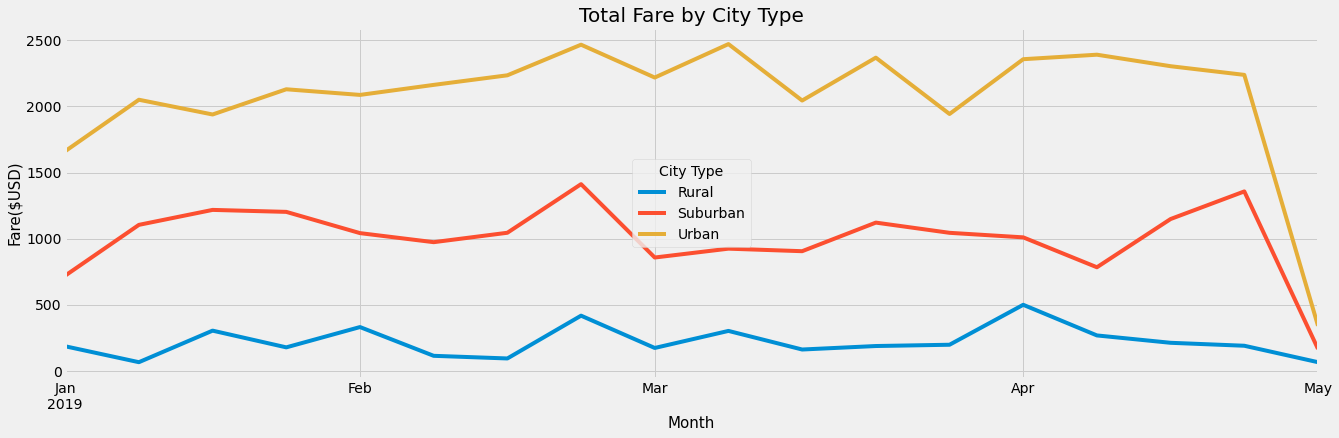

In [127]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plotting Fares for Rural, Suburban & Urban City Type
ax= Resampled_df.plot (figsize=(20,6))

# Add the title, y-axis label, legend and grid.
ax.set_title("Total Fare by City Type", size = 20)
ax.set_ylabel("Fare($USD)", size = 15)
ax.set_xlabel("Month", size = 15)
ax.legend(title = "City Type")
plt.style.use('fivethirtyeight')
#Save the figure.
plt.savefig("Analysis/Fig 8.png")

plt.show()
